#### Primero importamos las librerias necesarias

In [1]:
# Para convertirlo en un df
import pandas as pd
# Para cálculos numericos
import numpy as np
# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
# Para normalizar los datos
from sklearn.preprocessing import MinMaxScaler

## ***1.- Recopilación de Datos***

Este conjunto de datos se encuentra en esta pagina:
https://www.kaggle.com/datasets/camnugent/california-housing-prices

Es importante mirarlo para entenderlo mejor

In [2]:
# Vamos a leer estos datos para entenderlo mejor
df = pd.read_csv('../../3.- Datasets\housing.csv')

In [3]:
df2 = df.copy()

#### Vamos a añadir algunas imperfecciones a nuestro codigo para mas adelante

In [4]:
# Establecer algunas entradas como nulas de manera aleatoria
filas_a_modificar = np.random.choice(df.index, size=3, replace=False)
columnas_a_modificar = np.random.choice(df.columns, size=3, replace=False)

df.loc[filas_a_modificar, columnas_a_modificar] = np.nan

In [5]:
# Establecer algunas entradas como nulas de manera aleatoria
filas_a_modificar = np.random.choice(df.index, size=3, replace=False)
columnas_a_modificar = np.random.choice(df.columns, size=3, replace=False)

df.loc[filas_a_modificar, columnas_a_modificar] = np.nan

## **2.- Exploración y Análisis de Datos**

In [6]:
# Mostramos las 5 primeras filas de mi df
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20637 non-null  float64
 1   latitude            20637 non-null  float64
 2   housing_median_age  20637 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20430 non-null  float64
 5   population          20637 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20637 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Aqui se ve que todas las columnas son de tipo numerico, menos la ultima que es una categoria

In [8]:
#vemos algunas metricas como la mediana, minimo, maximo etc..
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20637.00000,20637.000000,20637.000000,20640.000000,20430.000000,20637.000000,20640.000000,20640.000000,20637.000000
mean,-119.56989,35.631952,28.639773,2635.763081,537.846892,1425.357804,499.539680,3.870671,206843.894994
std,2.00339,2.135883,12.586414,2181.615252,421.401821,1132.468199,382.329753,1.899822,115397.378367
min,-124.35000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.80000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.49000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.01000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264700.000000
max,-114.31000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Vamos a visualizar un poco nuestros datos

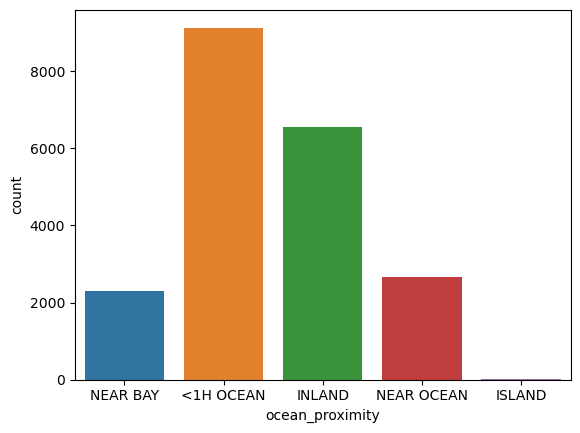

In [9]:
sns.countplot(x='ocean_proximity', data=df)
plt.show()

#### Esta es la distribucion de la categoria de proximidad al oceano

## 3.- División de Datos

#### Hay que dividir los datos en entrenamiento, evaluación y prueba

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# importamos train_test_split para dividir los datos
from sklearn.model_selection import train_test_split

# en este caso solo lo haremos en entrenamiento y evaluacion
train_set, val_set = train_test_split(df, test_size=0.1, random_state=42)

In [12]:
print(f'la longitud de train_set es de: {len(train_set)}')
print(f'la longitud de val_set es de: {len(val_set)}')

la longitud de train_set es de: 18576
la longitud de val_set es de: 2064


#### Ahora separamos las etiquetas (salidas 'y'), de las caracteristicas (entradas 'x')

#### en este cado la etiqueta que tratamos de predecir es la de el precio

In [13]:
# separamos el de entrenamiento 
x_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value'].copy()

In [14]:
# Ahora los de validación
x_val = val_set.drop('median_house_value', axis=1)
y_val = val_set['median_house_value'].copy()

## 4.- Preprocesamiento de datos

#### Antes de entrenar al módelo, hay que preparar los datos, como imputar, normalizar o estandarizar y codificar

In [15]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5564,-118.29,33.91,41.0,2475.0,532.0,1416.0,470.0,3.8372,<1H OCEAN
16016,-122.46,37.73,52.0,3547.0,506.0,1276.0,491.0,8.0069,NEAR BAY
17131,-122.15,37.46,30.0,4198.0,1244.0,2678.0,1147.0,3.6712,NEAR BAY
11752,-121.21,38.76,16.0,1608.0,296.0,792.0,286.0,3.1583,INLAND
2308,-119.75,36.83,15.0,2793.0,436.0,1411.0,441.0,4.9292,INLAND


##### Los NaN son los valores nulos que hay que eliminar

In [16]:
columns_with_nulls = x_train.columns[x_train.isnull().any()]
print(columns_with_nulls)

Index(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'population'],
      dtype='object')


#### Estas son las columnas con valores nulos

### 4.1.- Imputar

In [18]:
#para imputar los datos importamos simpleimputer
from sklearn.impute import SimpleImputer

# seleccionamos las columnas numericas
numeric_columns = x_train.select_dtypes(include=['number']).columns

# seleccionamos las categorias
cat_columns = x_train.select_dtypes(include=['object']).columns

# Imputamos valores numéricos con la mediana
numeric_imputer = SimpleImputer(strategy='median')# instanciamos ese imputador numerico
x_train[numeric_columns] = numeric_imputer.fit_transform(x_train[numeric_columns])

# Imputamos las categorias con el valor mas frecuente
imputer_categorical = SimpleImputer(strategy='most_frequent')# instanciamos ese imputador categorico
x_train[cat_columns] = imputer_categorical.fit_transform(x_train[cat_columns])

#### Los valores nulos se han eliminado, en cambio esta la media y la categoria mas frecuente

In [19]:
columns_with_nulls = x_train.columns[x_train.isnull().any()]
print(columns_with_nulls)

Index([], dtype='object')


### 4.2.- Normalizar

#### Ahora vamos a normalizar los datos, es decir, vamos a hacer que los valores no tengan mucha diferencia entre si, sino que tengan una escala entre 0 y 1

In [20]:
# lo haremos con minmaxscaler

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos solo las columnas numéricas para la normalización
numeric_cols = x_train.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

# Ahora, el df contiene las columnas numéricas normalizadas
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5564,0.603586,0.144681,0.784314,0.062897,0.082402,0.039603,0.077125,0.230155,<1H OCEAN
16016,0.188247,0.551064,1.000000,0.090162,0.078367,0.035679,0.080579,0.517717,NEAR BAY
17131,0.219124,0.522340,0.568627,0.106720,0.192893,0.074974,0.188456,0.218707,NEAR BAY
11752,0.312749,0.660638,0.294118,0.040846,0.045779,0.022114,0.046867,0.183335,INLAND
2308,0.458167,0.455319,0.274510,0.070985,0.067505,0.039463,0.072357,0.305465,INLAND


### 4.3.- Codificar

#### El ultimo paso seria codificarlo, es decir, convertir las categorias (letras), en números

In [21]:
# Seleccionar columnas categóricas
cat_columns1 = x_train.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding al conjunto de entrenamiento
x_train = pd.get_dummies(x_train, columns=cat_columns1, dtype=float)

#### ok, x_train ya esta, ahora hay que hacer lo mismo con x_val

#### Lo se, es un coñaso empezar de nuevo, pues por eso estan los pipelines que lo aprenderemos en otro momento

In [22]:
#para imputar los datos importamos simpleimputer
from sklearn.impute import SimpleImputer

# seleccionamos las columnas numericas
numeric_columns = x_val.select_dtypes(include=['number']).columns

# seleccionamos las categorias
cat_columns = x_val.select_dtypes(include=['object']).columns

# Imputamos valores numéricos con la mediana
numeric_imputer = SimpleImputer(strategy='median')# instanciamos ese imputador numerico
x_val[numeric_columns] = numeric_imputer.fit_transform(x_val[numeric_columns])

# Imputamos las categorias con el valor mas frecuente
imputer_categorical = SimpleImputer(strategy='most_frequent')# instanciamos ese imputador categorico
x_val[cat_columns] = imputer_categorical.fit_transform(x_val[cat_columns])

In [23]:
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos solo las columnas numéricas para la normalización
numeric_cols = x_val.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
x_val[numeric_cols] = scaler.fit_transform(x_val[numeric_cols])

# Ahora, el df contiene las columnas numéricas normalizadas

In [24]:
# Seleccionar columnas categóricas
cat_columns1 = x_val.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding al conjunto de entrenamiento
x_val = pd.get_dummies(x_val, columns=cat_columns1, dtype=float)